In [4]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from tqdm import tqdm

def convert_tif_to_png(source_dir, target_dir=None, preserve_structure=True):
    """
    Convert all TIF/TIFF files to PNG format.
    
    Args:
        source_dir: Source directory containing TIF files
        target_dir: Target directory for PNG files (if None, creates source_dir + '_png')
        preserve_structure: If True, preserves the folder structure
    """
    source_path = Path(source_dir)
    
    # Set target directory
    if target_dir is None:
        target_dir = str(source_path) + '_png'
    target_path = Path(target_dir)
    
    # Find all TIF files
    tif_extensions = ['*.tif', '*.tiff', '*.TIF', '*.TIFF']
    tif_files = []
    for ext in tif_extensions:
        tif_files.extend(source_path.rglob(ext))
    
    if len(tif_files) == 0:
        print(f"No TIF files found in {source_dir}")
        return
    
    print(f"Found {len(tif_files)} TIF files to convert")
    print(f"Target directory: {target_dir}")
    
    converted = 0
    errors = 0
    
    # Convert each file
    for tif_file in tqdm(tif_files, desc="Converting"):
        try:
            # Calculate relative path
            rel_path = tif_file.relative_to(source_path)
            
            # Create target path
            if preserve_structure:
                png_path = target_path / rel_path.parent / (rel_path.stem + '.png')
            else:
                png_path = target_path / (rel_path.stem + '.png')
            
            # Create directory if needed
            png_path.parent.mkdir(parents=True, exist_ok=True)
            
            # Determine if this is a mask file (in 'masks' folder)
            is_mask = 'masks' in str(rel_path)
            
            # Open and convert
            with Image.open(tif_file) as img:
                img_array = np.array(img)
                
                if is_mask:
                    # For masks: preserve exact integer values, no normalization
                    # Just ensure it's uint8
                    if img_array.dtype != np.uint8:
                        img_array = img_array.astype(np.uint8)
                    img = Image.fromarray(img_array, mode='L')
                else:
                    # For images: normalize 16-bit or float to 8-bit
                    if img.mode not in ['RGB', 'L', 'RGBA']:
                        if img.mode in ['I', 'I;16', 'F']:
                            # Normalize 16-bit or float images to 8-bit
                            img_array = ((img_array - img_array.min()) / 
                                        (img_array.max() - img_array.min()) * 255).astype(np.uint8)
                            img = Image.fromarray(img_array, mode='L')
                        else:
                            img = img.convert('L')
                
                # Save as PNG
                img.save(png_path, 'PNG')
            
            converted += 1
            
        except Exception as e:
            print(f"\nError converting {tif_file}: {str(e)}")
            errors += 1
    
    print(f"\n{'='*60}")
    print(f"Conversion complete!")
    print(f"Successfully converted: {converted} files")
    print(f"Errors: {errors} files")
    print(f"{'='*60}")

def convert_dataset(data_dir='sand_data_seg', output_dir='sand_data_seg_png'):
    """
    Convert a dataset with train/val split structure.
    
    Converts:
    data_dir/
        train/
            images/ (TIF)
            masks/ (TIF)
        val/
            images/ (TIF)
            masks/ (TIF)
    
    To:
    output_dir/
        train/
            images/ (PNG)
            masks/ (PNG)
        val/
            images/ (PNG)
            masks/ (PNG)
    """
    print(f"Converting dataset from {data_dir} to {output_dir}")
    convert_tif_to_png(data_dir, output_dir, preserve_structure=True)
    
    # Verify the conversion
    print("\n" + "="*60)
    print("VERIFICATION")
    print("="*60)
    
    output_path = Path(output_dir)
    if output_path.exists():
        for split in ['train', 'val']:
            for folder in ['images', 'masks']:
                path = output_path / split / folder
                if path.exists():
                    png_count = len(list(path.glob('*.png')))
                    print(f"{split}/{folder}: {png_count} PNG files")

if __name__ == "__main__":
    # Example 1: Convert entire dataset with train/val structure
    print("Option 1: Convert entire dataset")
    print("-" * 60)
    convert_dataset(data_dir='sand_data_seg', output_dir='sand_data_seg_png')
    
    # Example 2: Convert a single directory
    # Uncomment to use:
    # print("\n\nOption 2: Convert single directory")
    # print("-" * 60)
    # convert_tif_to_png(
    #     source_dir='path/to/your/tif/folder',
    #     target_dir='path/to/output/png/folder',
    #     preserve_structure=True
    # )

Option 1: Convert entire dataset
------------------------------------------------------------
Converting dataset from sand_data_seg to sand_data_seg_png
Found 68 TIF files to convert
Target directory: sand_data_seg_png


Converting: 100%|██████████| 68/68 [00:31<00:00,  2.14it/s]


Conversion complete!
Successfully converted: 68 files
Errors: 0 files

VERIFICATION
train/images: 27 PNG files
train/masks: 27 PNG files
val/images: 7 PNG files
val/masks: 7 PNG files


EXAMPLE 1: Inspect single mask
Inspecting mask: sand_data_seg_png/train/masks/sand1_recon_01212.png

--- BASIC INFO ---
File: sand1_recon_01212.png
PIL Mode: L
Array shape: (3232, 3232)
Array dtype: uint8
Min value: 0
Max value: 4

--- UNIQUE VALUES ---
Number of unique values: 5
Unique values: [0 1 2 3 4]

--- PIXEL COUNTS ---
Value 0: 2241731 pixels (21.46%)
Value 1: 4361332 pixels (41.75%)
Value 2: 3172066 pixels (30.37%)
Value 3: 669415 pixels (6.41%)
Value 4: 1280 pixels (0.01%)

--- SAMPLE PIXEL VALUES (top-left corner) ---
First 10x10 pixels:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

--- VISUALIZATION ---


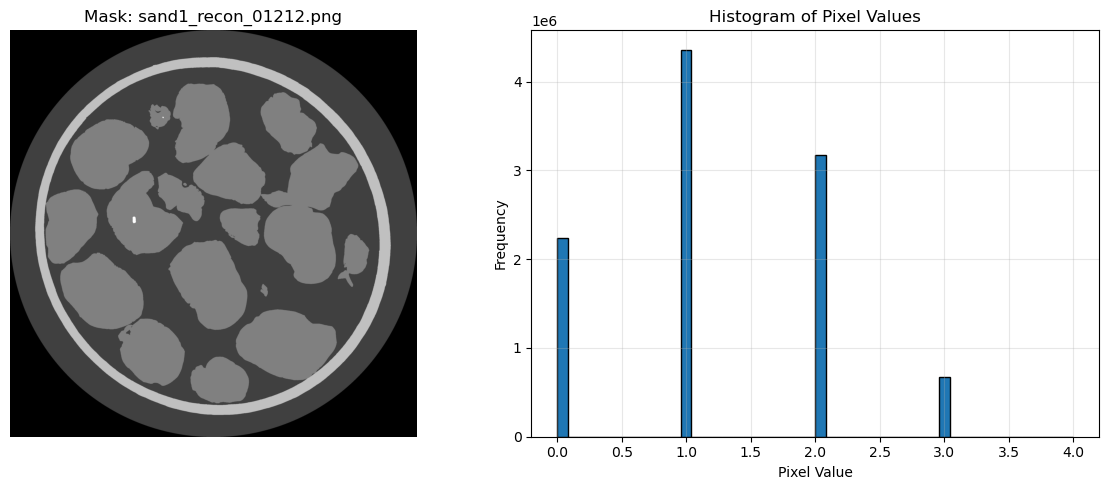

Inspecting mask: sand_data_seg_png/train/masks/sand1_recon_01212.png

--- BASIC INFO ---
File: sand1_recon_01212.png
PIL Mode: L
Array shape: (3232, 3232)
Array dtype: uint8
Min value: 0
Max value: 4

--- UNIQUE VALUES ---
Number of unique values: 5
Unique values: [0 1 2 3 4]

--- PIXEL COUNTS ---
Value 0: 2241731 pixels (21.46%)
Value 1: 4361332 pixels (41.75%)
Value 2: 3172066 pixels (30.37%)
Value 3: 669415 pixels (6.41%)
Value 4: 1280 pixels (0.01%)

--- SAMPLE PIXEL VALUES (top-left corner) ---
First 10x10 pixels:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

--- VISUALIZATION ---


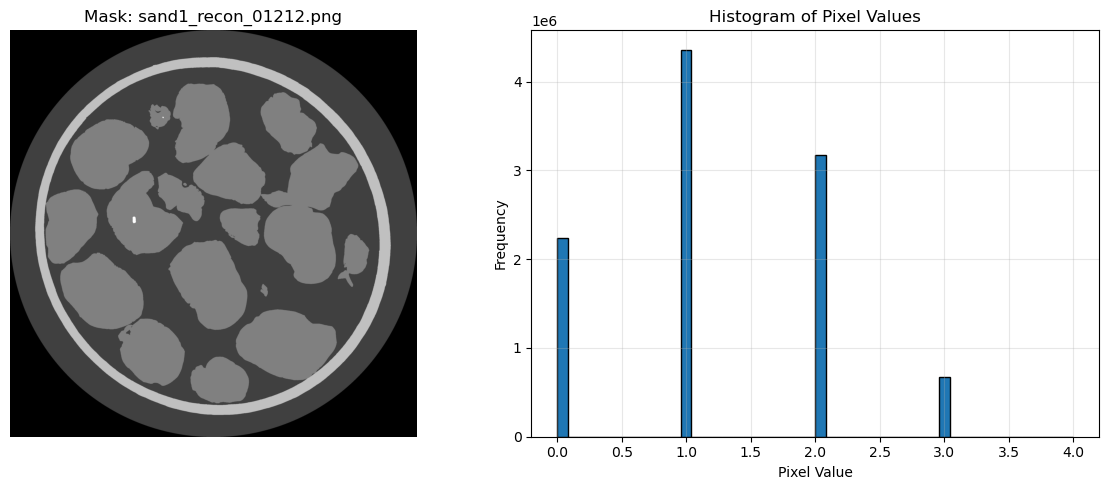

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

def inspect_mask(mask_path):
    """
    Thoroughly inspect a mask file to understand its format and values.
    
    Args:
        mask_path: Path to the mask file
    """
    print("=" * 70)
    print(f"Inspecting mask: {mask_path}")
    print("=" * 70)
    
    # Load mask
    mask = Image.open(mask_path)
    mask_array = np.array(mask)
    
    # Basic information
    print(f"\n--- BASIC INFO ---")
    print(f"File: {Path(mask_path).name}")
    print(f"PIL Mode: {mask.mode}")
    print(f"Array shape: {mask_array.shape}")
    print(f"Array dtype: {mask_array.dtype}")
    print(f"Min value: {mask_array.min()}")
    print(f"Max value: {mask_array.max()}")
    
    # Unique values
    print(f"\n--- UNIQUE VALUES ---")
    if len(mask_array.shape) == 2:
        # Single channel (grayscale)
        unique_values = np.unique(mask_array)
        print(f"Number of unique values: {len(unique_values)}")
        print(f"Unique values: {unique_values}")
        
        # Count pixels for each value
        print(f"\n--- PIXEL COUNTS ---")
        for val in unique_values:
            count = np.sum(mask_array == val)
            percentage = count / mask_array.size * 100
            print(f"Value {val}: {count} pixels ({percentage:.2f}%)")
    
    elif len(mask_array.shape) == 3:
        # Multi-channel (RGB/RGBA)
        print(f"Channels: {mask_array.shape[2]}")
        
        # Get unique colors
        unique_colors = np.unique(mask_array.reshape(-1, mask_array.shape[2]), axis=0)
        print(f"Number of unique colors: {len(unique_colors)}")
        print(f"\n--- UNIQUE COLORS (RGB tuples) ---")
        
        for i, color in enumerate(unique_colors):
            # Count pixels with this color
            if mask_array.shape[2] == 3:
                mask_matching = np.all(mask_array == color, axis=2)
            else:  # RGBA
                mask_matching = np.all(mask_array[:, :, :3] == color[:3], axis=2)
            
            count = np.sum(mask_matching)
            percentage = count / (mask_array.shape[0] * mask_array.shape[1]) * 100
            
            if mask_array.shape[2] == 3:
                print(f"Color {i}: RGB{tuple(color)} - {count} pixels ({percentage:.2f}%)")
            else:
                print(f"Color {i}: RGBA{tuple(color)} - {count} pixels ({percentage:.2f}%)")
    
    # Sample some pixel values
    print(f"\n--- SAMPLE PIXEL VALUES (top-left corner) ---")
    if len(mask_array.shape) == 2:
        print("First 10x10 pixels:")
        print(mask_array[:10, :10])
    else:
        print("First 5 pixels (showing RGB values):")
        for i in range(min(5, mask_array.shape[0])):
            print(f"Row {i}: {mask_array[i, :5]}")
    
    # Visualization
    print(f"\n--- VISUALIZATION ---")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original mask
    if len(mask_array.shape) == 2:
        axes[0].imshow(mask_array, cmap='gray', vmin=0, vmax=mask_array.max())
    else:
        axes[0].imshow(mask_array)
    axes[0].set_title(f'Mask: {Path(mask_path).name}')
    axes[0].axis('off')
    
    # Histogram
    if len(mask_array.shape) == 2:
        axes[1].hist(mask_array.flatten(), bins=50, edgecolor='black')
        axes[1].set_xlabel('Pixel Value')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title('Histogram of Pixel Values')
        axes[1].grid(True, alpha=0.3)
    else:
        # For RGB, show histogram of each channel
        colors = ['red', 'green', 'blue']
        for i in range(min(3, mask_array.shape[2])):
            axes[1].hist(mask_array[:, :, i].flatten(), bins=50, 
                        alpha=0.5, label=colors[i], color=colors[i])
        axes[1].set_xlabel('Pixel Value')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title('Histogram per Channel')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return mask_array


def inspect_multiple_masks(mask_dir, num_samples=3):
    """
    Inspect multiple masks from a directory.
    
    Args:
        mask_dir: Directory containing mask files
        num_samples: Number of masks to inspect
    """
    mask_paths = list(Path(mask_dir).glob("*.png"))
    
    if len(mask_paths) == 0:
        print(f"No PNG files found in {mask_dir}")
        return
    
    print(f"\nFound {len(mask_paths)} mask files")
    print(f"Inspecting {min(num_samples, len(mask_paths))} samples...\n")
    
    for i, mask_path in enumerate(mask_paths[:num_samples]):
        mask_array = inspect_mask(mask_path)
        if i < num_samples - 1:
            print("\n" + "="*70 + "\n")


if __name__ == "__main__":
    # Example 1: Inspect a single mask
    print("EXAMPLE 1: Inspect single mask")
    mask_path = "sand_data_seg_png/train/masks/sand1_recon_01212.png"
    inspect_mask(mask_path)
    
    # Example 2: Inspect multiple masks from training set
    # print("\n\nEXAMPLE 2: Inspect multiple training masks")
    # inspect_multiple_masks("sand_data_seg_png/train/masks", num_samples=3)
    
    # Example 3: Inspect validation masks
    # print("\n\nEXAMPLE 3: Inspect validation masks")
    # inspect_multiple_masks("sand_data_seg_png/val/masks", num_samples=2)

# Inspect a single mask - replace with your actual path
mask_path = "sand_data_seg_png/train/masks/sand1_recon_01212.png"
inspect_mask(mask_path)
